# Part One: Network Models

## Watts-Strogatz Networks

* Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length < d > for each one. Describe what happens to the network when p = 1.

In [55]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random as rnd
import collections

In [56]:
#set up vars
N = 500
k = 4 #average degree
p = [0, 0.1, 1]

#generating graphs
generated_graphs = []
for prob in p:
    generated_graphs.append(nx.watts_strogatz_graph(N,k,prob))

#calculate <d> for each graph
for i,item in enumerate(generated_graphs):
    print "p = "+ str(p[i]) + ", " + str(nx.average_shortest_path_length(item))

p = 0, 62.875751503
p = 0.1, 7.21809218437
p = 1, 4.74824048096


Describe what happens to the network when p = 1.
* When p = 1 the graph becomes very dense.

Let's understand the behavior of the WS model as we increase p in more detail. Generate 50 networks with N = 500, < k > = 4, for each of p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}. Calculate the average of < d > as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [57]:
N = 500
k = 4
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

#generating graphs
generated_graphs = {}
for prob in p:
    generated_subgraphs = [] #to store 50 generated graphs with p = prob
    for j in range(0,50):
        generated_subgraphs.append(nx.watts_strogatz_graph(N,k,prob))
    generated_graphs[prob] = generated_subgraphs
    
#calculate <d> for each graph
calculated_d = {}
for prob in p:
    graphs = generated_graphs[prob] #get graphs of particular prob (p)
    calculated_d_ofgraphs = [] #to store calculated <d>
    for i, item in enumerate(graphs):
        calculated_d_ofgraphs.append(nx.average_shortest_path_length(item))
    calculated_d[prob] = calculated_d_ofgraphs

In [58]:
#calculating standard deviation and mean
res_x = []
res_y = []
res_dev = []
for prob in p:
    res_y.append(np.mean(calculated_d[prob]))
    res_x.append(prob)
    res_dev.append(np.std(calculated_d[prob]))

Now we have obtained all data for plotting
* probability (x axis)
* mean (y axis)
* deviation

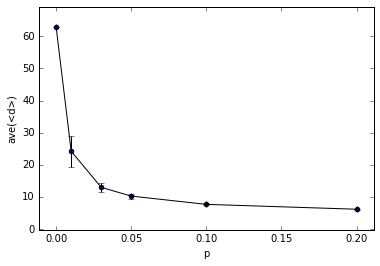

In [59]:
x = res_x #probability
y = res_y #mean
yerr = res_dev #deviation

plt.figure()
lines = plt.errorbar(x, y, xerr=0, yerr = yerr)
plt.ylabel('ave(<d>)')
plt.xlabel('p')
plt.margins(0.05, 0.1) #inner margin 
plt.setp(lines, 'color', 'black', 'linewidth', 1.0)
plt.scatter(x,y,s=20) #size of dots
plt.show()

## The Barabasi-Albert Model
* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

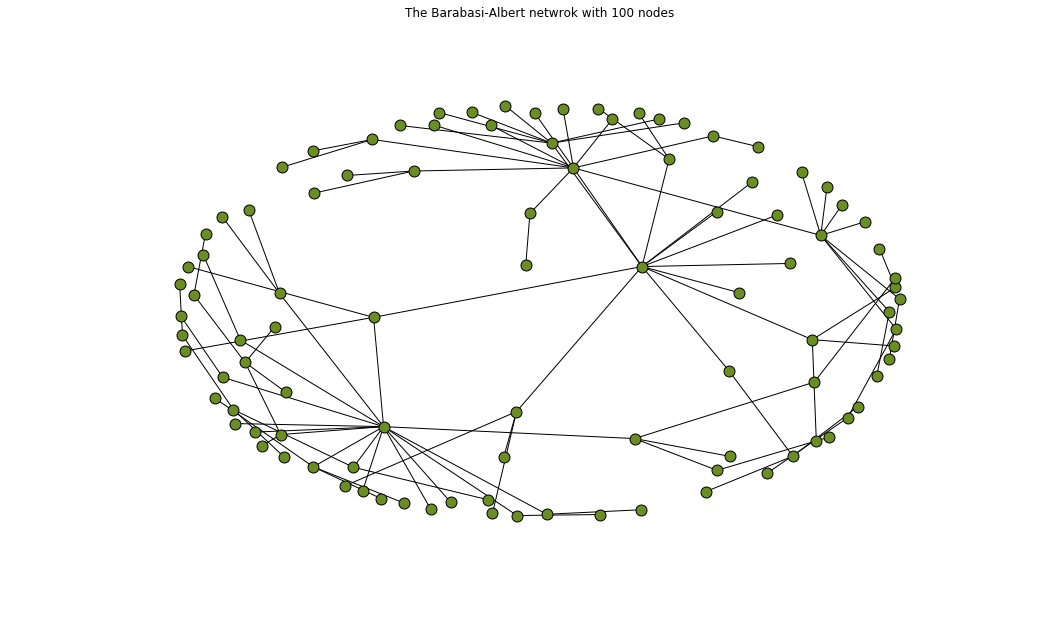

In [91]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

G = nx.Graph()
G.add_edge(0,1)
list = [0,1]
for i in range(2,100):
    randNode = np.random.choice(list)
    G.add_edge(i, randNode)
    list.extend([i,randNode])
    
nx.draw_spring(G, node_size = 120, with_labels = False, node_color = '#6b8e23', k=0.15)
plt.title("The Barabasi-Albert netwrok with 100 nodes")
plt.show()

* Now create a 5000 node network.


In [61]:
G = nx.Graph()
G.add_edge(0,1)
list = [0,1]
for i in range (2, 5000):
    randNode = np.random.choice(list)
    G.add_edge(i, randNode)
    list.extend([i,randNode])

* What's the maximum and minimum degree?


In [62]:
degree_sequence = [d for n,d in G.degree().iteritems()]
print "Max degree is " + str(max(degree_sequence))
print "Min degree is " + str(min(degree_sequence))

Max degree is 106
Min degree is 1


* Now, bin the degree distribution, for example using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.

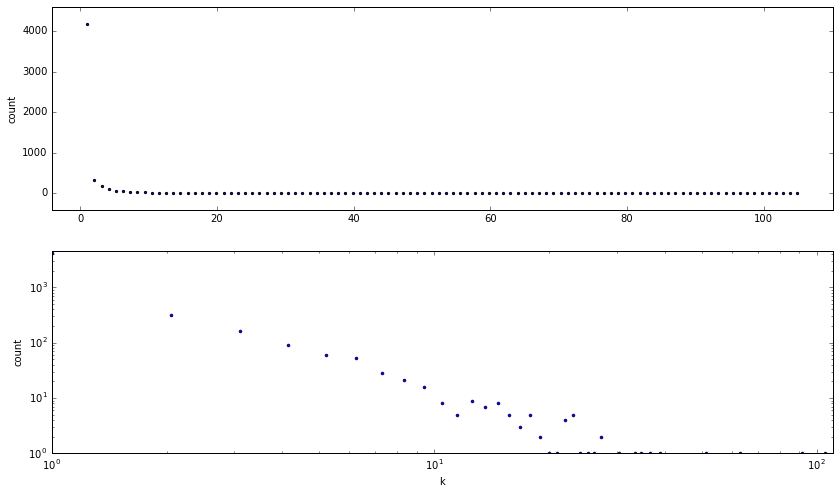

In [92]:
val, bins = np.histogram(degree_sequence, bins=100)
bins = np.delete(bins, -1)

# Two subplots, the axes array is 1-d
plt.subplot(211)
plt.margins(0.05, 0.1) #inner margin 
plt.scatter(bins, val, s=5)
plt.ylabel('count')

plt.subplot(212)
plt.margins(0.05, 0.1) #inner margin 
plt.ylabel('count')
plt.xlabel('k')
plt.loglog(bins, val,'bo', markersize = 3)

plt.show()

## Power-laws and the friendship paradox
* Pick a node i at random (e.g. use random.choice). Find its degree.

In [64]:
rand_node = rnd.choice(G.nodes())
degree_rand_node = G.degree(rand_node)
print "Degree of random node is " + str(degree_rand_node)

Degree of random node is 1


* Find i's neighbors. And calculate their average degree.


In [65]:
neighbours = G.neighbors(rand_node)

neighbours_degree = []
for item in neighbours:
    neighbours_degree.append(G.degree(item))
    
neighbours_average_degree = np.mean(neighbours_degree)

print "Average degree of neighbors is " + str(neighbours_average_degree)

Average degree of neighbors is 3.0


* Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.


In [66]:
if(degree_rand_node > neighbours_average_degree):
    print "I has more friends then its neighbours"
else:
    print "I has less friends then its neighbours"

I has less friends then its neighbours


* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [67]:
true_counter = 0;
nodes = G.nodes()
for i in range(0,1000):
    #random nodes degree
    rand_node = rnd.choice(nodes)
    degree_rand_node = G.degree(rand_node)
    
    #get neighbors and calculate their average degree 
    neighbours = G.neighbors(rand_node)
    
    neighbours_degree = []
    for item in neighbours:
        neighbours_degree.append(G.degree(item))

    neighbours_average_degree = np.mean(neighbours_degree)
    
    if(degree_rand_node < neighbours_average_degree):
        true_counter += 1

print "%d friendship paradox is true" % true_counter
print "(In "+ str((true_counter/float(1000))*100) + "% the friendship paradox is true)"

853 friendship paradox is true
(In 85.3% the friendship paradox is true)


## Growth without preferential attachment

* Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

In [68]:
#generate network without the preferential attachment.
G = nx.Graph()
G.add_edge(0,1)
list = [0,1]
for i in range (2, 5000):
    randNode = np.random.choice(list)
    G.add_edge(i, randNode)
    list.extend([i]) #we are not adding the random node to the list anymore

In [69]:
#calculate k - average degree first from graph G
G.degree()
G_degrees = [degree for i, degree in G.degree().iteritems()] #get degrees of each node
k = np.mean(G_degrees)

In [70]:
N = 5000
p = k/float((N - 1))# k = p*(n-1)
EG = nx.erdos_renyi_graph(n,p)

Now lets compare G and EG

In [71]:
print "G (Erdős–Rényi) has " + str(nx.number_connected_components(G)) + " component"
print "EG has " + str(nx.number_connected_components(EG)) + " components"

G (Erdős–Rényi) has 1 component
EG has 819 components


G has 1 component which means that there is always a path from one node to another wheras EG is rather clustered into smaller subgraphs

In [72]:
#lets calculate average degree for EG
EG.degree()
EG_degrees = [degree for i, degree in EG.degree().iteritems()] #get degrees of each node
EG_k = np.mean(EG_degrees)

#check degree 
print EG_k
print k

2.01080216043
1.9996


In [73]:
#getting degree sequence
EG_degree_sequence = [d for n,d in EG.degree().iteritems()]
G_degree_sequence = [d for n,d in G.degree().iteritems()]

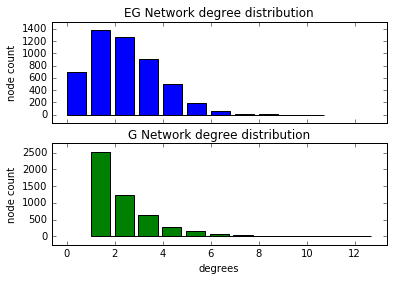

In [74]:
plt.clf()

#computing histogram
EG_val, EG_bins = np.histogram(EG_degree_sequence,bins=100)
EG_bins = np.delete(EG_bins, -1)

G_val, G_bins = np.histogram(G_degree_sequence, bins=100)
G_bins = np.delete(G_bins, -1)

# Two subplots, the axes array is 1-d
x1 = plt.subplot(211)
plt.margins(0.05, 0.1) #inner margin 
plt.bar(EG_bins, EG_val,width=0.80, color='b')
plt.ylabel('node count')
plt.title('EG Network degree distribution')
plt.setp(x1.get_xticklabels(), visible=False)

x2 = plt.subplot(212,sharex=x1)
plt.margins(0.05, 0.1) #inner margin 
plt.ylabel('node count')
plt.xlabel('degrees')
plt.bar(G_bins, G_val,width=0.80, color='g')
plt.title('G Network degree distribution')

plt.show()

Lets examine obtained degree distributions.

In Erdős–Rényi (EG, blue bars) graph the distribution is uniform and follows the set k. So most of its nodes have degree arround this k. Even though  the network generated without the preferential attachment (G, green bars) has the same k as well the distribution is significantly different. Most of the nodes have degree 1 and the number of them is decreasing with higher degree. We can interpret that as a graph with a lot of single nodes connected to one big cluster/hub. We can also see that there is not a single node with a degree 0 which means that if we pick every single node there is always a path to all nodes in the network from that node.


# Part Two: The Wikipedia Philosopher's network

The following code was used to extract the names of all philosophers from the wiki-markup texts of the list documents saved in `./philosophers/list_documents/`. 

The names are extracted from the pages using a regular expression. The regular expression matches all wiki-links preceded by an asterisk (\*) and optional whitespace which is the syntax for a list item. This can be done as all names are kept in such lists and allows to sort out most of the irrelevant links.

The philosopher names are saved in separate lists, one for each field in the variable `matches` and in a big set containing all unique names called `names`. Furthermore it constructs an array of `{ "name": String, "fields": List[String] }` objects and saves them to a file in JSON format for further processing.

In [75]:
import io
import re
import json

files = {"aesth" : "./philosophers/list_documents/aestheticians.txt",
         "epist" : "./philosophers/list_documents/epistemologists.txt",
         "ethic" : "./philosophers/list_documents/ethicists.txt",
         "logic" : "./philosophers/list_documents/logicians.txt",
         "metap" : "./philosophers/list_documents/metaphysicians.txt",
         "socpo" : "./philosophers/list_documents/social_and_political_philosophers.txt"}

def filterMatch(match):
    """ Filter function to filter out entries that are no philosopher names """
    return not match.lower().startswith("list of") and not match.lower().startswith("list_of")

def extractIdName(match):
    """ Extract the first part of the string if it contains a '|' """
    idx = match.find("|")
    if idx > 0:
        return match[:idx].replace("_"," ")
    else:
        return match.replace("_"," ")

# extract all matches in a dictionary (one list per file)
matches = {}
for cat,path in files.iteritems():
    f = io.open(path,"r",encoding="utf-8")
    matchlist = re.findall(r"\*\s?\[\[((?:[^|\]]*)\|?[^\]]+)\]\]",f.read())
    matches[cat] = [extractIdName(s) for s in filter(filterMatch,matchlist)]
    f.close()

# construct big set of unique names
all_names = set()
for names in matches.items():
    all_names = all_names.union(names[1])
    
# fields for each philosopher
philo_fields = []
for name in all_names:
    data = {"name": name, "fields": []}
    for cat in matches.keys():
        if name in matches[cat]: 
            data["fields"].append(cat)
    philo_fields.append(data)
    
# save list of philosophers as a file
with io.open("./philosophers/names.json","w",encoding="utf-8") as names_file:
    names_file.write(unicode(json.dumps(philo_fields, ensure_ascii=False)))

### Basic stats

** How many philosophers in each list? How many total? Which is the largest branch of philosophy? **

In [76]:
for cat,philos in matches.iteritems():
    print "%s: %d philosophers" % (cat,len(philos))
print "\nTotal %d unique philosophers" % len(all_names)

ethic: 272 philosophers
aesth: 124 philosophers
metap: 96 philosophers
socpo: 293 philosophers
logic: 271 philosophers
epist: 98 philosophers

Total 1011 unique philosophers


From the previous results we can extract the amount of philosophers in each list and the total amount. The branch "social and political philosophy" is the biggest judging by the number of philosophers in the corresponding list.

**Let's investigate philosophers active in multiple sub-fields in more detail.**
* **Create a list of every philosopher that occurs in more than one list.**
* **Which philosopher is in most lists & and how many?**
* **Use Python to sort the list according to how many lists each philosopher belongs to.**
* **Print the top 5 guys and their list counts. Have you heard of any of them?**

In [77]:
# get all philosophers with more than one field
multi_fields = filter(lambda p: len(p["fields"]) > 1,philo_fields)
# sort by number of fields
multi_fields.sort(key=lambda p: len(p["fields"]),reverse=True)
print "%d philosophers in more than one field\n" % len(multi_fields)
print "Busiest philosophers:"
for philo in multi_fields[:5]:
    print "%-30s:\t %s different fields" % (philo["name"],len(philo["fields"]))

112 philosophers in more than one field

Busiest philosophers:
Aristotle                     :	 6 different fields
Plato                         :	 5 different fields
Bertrand Russell              :	 5 different fields
Immanuel Kant                 :	 5 different fields
Ayn Rand                      :	 4 different fields


The above code extracts all philosophers present in more than one list sorted by the number of fields they are found in. Aristotle occurs in all of the 6 lists. It turns out that he and other very famous philosophers like Plato and Immanuel Kant actually influenced multiple areas of philosophy. 

### Downloading the philosopher wiki-pages

With the `names.json` file created in the previous section as an input, we can now use the Wikipedia API to download the page contents for every name saved to the file. In order to minimize the processing time, it is possible to request up to 50 pages per HTTP request (see https://www.mediawiki.org/wiki/API:Query#Specifying_pages), which is utilized in our solution below. 

The data is saved to another json-file named `data.json`. The code also maintains a list `not_processed` which is filled with entries where the page does not exist. This occurs when list entries are added although the linked page does not exist yet. These entries are nevertheless part of the data as they might be referenced from other philosophers' pages as well. Some links consist only of a redirect to another page in which case the contents of the linked page are retreived.

In [78]:
import io
import urllib2 
import json

NAMES_PATH = "./philosophers/names.json"
WIKI_API_URL = "https://en.wikipedia.org/w/api.php"
WIKI_REQUEST_PARAMS = "action=query&format=json&prop=revisions&rvprop=content"

# load names (and fields) from file
with io.open(NAMES_PATH,"r",encoding="utf-8") as names_file:
    fields = { p["name"] : p["fields"] for p in json.loads(names_file.read()) }

# request pages from API (50 at a time)
N = 50
names_left = [p for p in fields.keys()]
data, not_processed = [], []
while names_left:
    request_titles = names_left[:N]
    names_left = names_left[N:]
    titles = urllib2.quote("|".join(request_titles).encode("utf-8"))
    
    # get the next batch
    request_url = "%s?%s&titles=%s" % (WIKI_API_URL,WIKI_REQUEST_PARAMS,titles)
    response = urllib2.urlopen(request_url)
    contents = json.loads(response.read())
    for pageid,page in contents.get("query").get("pages").iteritems():
        if page.has_key("revisions"):
            text = page["revisions"][0]["*"]
            # check if the page contents are somewhere else (and get them)
            if "#REDIRECT" in text:
                linktexts = re.findall(r"\[\[((?:[^|\]]*)\|?[^\]]+)\]\]", text)
                if linktexts:
                    title = urllib2.quote(linktexts[0].encode("utf-8"))
                    request_url = "%s?%s&titles=%s" % (WIKI_API_URL,WIKI_REQUEST_PARAMS,titles)
                    response = urllib2.urlopen(request_url)
                    contents = json.loads(response.read())
                    text = contents["query"]["pages"].values()[0]["revisions"][0]["*"]
                else:
                    text = ""
        else:
            text = ""
            not_processed.append(page["title"])
        data.append({"name": page["title"], "fields": fields[page["title"]], "text": text, "pageid": pageid })

        
# save data to file
with io.open('philosophers/data.json', 'w', encoding='utf-8') as data_file:
    data_file.write(unicode(json.dumps(data, ensure_ascii=False)))

In [79]:
# Check the results
print "%d entries created" % len(data)
print "%d pages not found" % len(not_processed)

1010 entries created
10 pages not found


Now that the data has been extracted and saved, we can process the page contents for each philosopher to extract all links. This is done similarly to the first part, while this time only links to known philosophers are kept. That way, we obtain all information needed to construct a directed graph of philosophers.

In [80]:
import json
import re
import io
import networkx as nx

NAMES_PATH = "./philosophers/names.json"
DATA_PATH = "./philosophers/data.json"

# load names
with io.open(NAMES_PATH,"r",encoding="utf-8") as names_file:
    names = [p["name"] for p in json.loads(names_file.read())]

# load data
with io.open(DATA_PATH,"r",encoding="utf-8") as data_file:
    data = json.loads(data_file.read())
    
# extract links to other philosophers from texts
graph_data = {}
for philo in data:
    matchlist = re.findall(r"\[\[((?:[^|\]]*)\|?[^\]]+)\]\]", philo["text"])
    links = [extractIdName(s) for s in matchlist if extractIdName(s) in names]
    graph_data[philo["name"]] = {"fields": philo["fields"], "links": sorted(set(links))}
    
# check if we got it right
print "Aristotle's page links to %d other philosophers" % len(graph_data["Aristotle"]["links"])

Aristotle's page links to 24 other philosophers


### Degree distributions

**Why do you think we want to use a directed graph? Could have we used an undirected graph instead?**

It is important to notice that we are not directly analyzing work relationships between philosophers but mentions in their Wikipedia articles. A work-relationship graph would probably be undirected. A reference from a philosopher's page to another philosophers page, though, can have a different meaning than the same link in the other direction.

A philosopher that is mentioned on a lot of other philosophers pages has probably not worked together with all of them but rather influenced their work. This can be a measure of his/her importance. The other way around, a lot of mentions on a philosopher's page do not hint at an influencial philosopher but rather at the fact that the philosopher's work *was influenced* by a lot of others. 

An undirected graph could not have reflected this as it merges these two characteristics, which are inherently different. The directed graph is constructed using NetworkX in the following code. 

In [81]:
import networkx as nx
import numpy as np
#build graph from the links
G = nx.DiGraph()
G.add_nodes_from(graph_data.keys())
for p,pdata in graph_data.iteritems():
    G.add_edges_from([(p,link) for link in pdata["links"]])

** What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree? **

In [82]:
print "Number of nodes: %d" % G.number_of_nodes()
print "Number of links: %d" % G.number_of_edges()
print "Degree mean: %.2f" % np.mean(G.degree().values())
print "Degree median: %d" % np.median(G.degree().values())

Number of nodes: 1010
Number of links: 4750
Degree mean: 9.41
Degree median: 4


The fact that the median deviates significantly from the mean shows that there are some outliers with high counts which influence the average degree. 

** List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before? **

As mentioned before, the in-degree of a philosopher hints at how many colleagues base their work on the work of this philosopher, were influenced or worked together. It reflects approximately the impact, that the work of the philosopher had on the field in general. 

The out degree, on the other hand, is more a sign of who influenced a philosopher. It is a very local trait, meaning that a totally unknown philosopher may have a very high out degree. The out-degree is solely determined by the wiki page of that one philosopher while the in-degree is build by the whole network.

Looking at the results of the top 10 philosophers by in- and out-degree below, there seems to be a correlation between the degrees, though. Seven philosophers are present in both top 10 lists. This may have several reasons. It might be because the pages also contain "back-references" of philosophers that were influenced through their work. Another reason could be that more famous or important topics tend to have longer wiki pages which simply leaves more space for references to less important pages that would have been ommitted otherwise.

In [83]:
in_deg = G.in_degree()
out_deg = G.out_degree()
top_10_in = sorted(in_deg,key=in_deg.__getitem__,reverse=True)[:10]
top_10_out = sorted(out_deg,key=out_deg.__getitem__,reverse=True)[:10]

print "%-40s\t%-40s\n" % ("Top 10 (in-degree)","Top 10 (out-degree)")
for i in range(10):
    print "%-40s%d\t%-40s%d" % (top_10_in[i],in_deg[top_10_in[i]],top_10_out[i],out_deg[top_10_out[i]])

Top 10 (in-degree)                      	Top 10 (out-degree)                     

Immanuel Kant                           133	Georg Wilhelm Friedrich Hegel           50
Aristotle                               127	Friedrich Nietzsche                     44
Bertrand Russell                        96	Immanuel Kant                           42
Plato                                   91	Martin Heidegger                        40
Karl Marx                               88	Bertrand Russell                        40
Ludwig Wittgenstein                     72	David Hume                              38
David Hume                              70	Søren Kierkegaard                       33
Friedrich Nietzsche                     69	John Stuart Mill                        32
John Locke                              59	Plato                                   31
Georg Wilhelm Friedrich Hegel           58	Michel Foucault                         31


** Plot the distribution of in-degrees and out-degrees. What is the most common degree? **

Most common in-degree: 0
Most common out-degree: 0


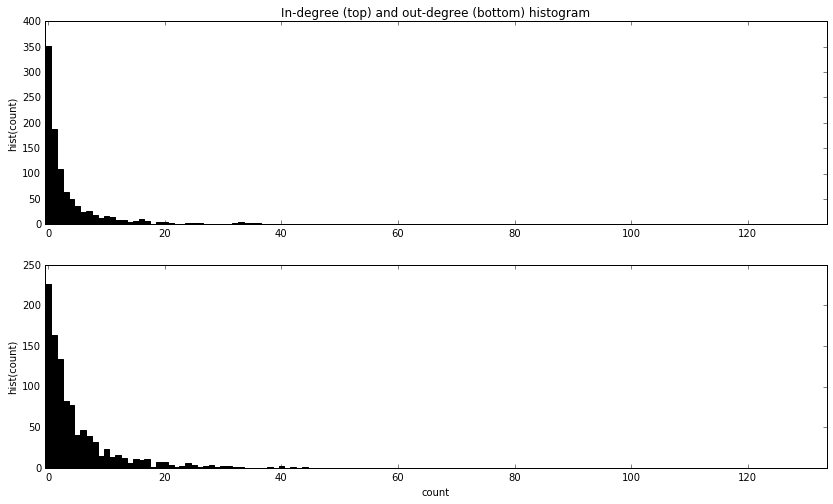

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

in_degs = in_deg.values()
in_edges = np.subtract(range(np.max(in_degs)+1),0.5)
in_hist,_ = np.histogram(in_degs,bins=in_edges)

out_degs = out_deg.values()
out_edges = np.subtract(range(np.max(out_degs)+1),0.5)
out_hist,_ = np.histogram(out_degs,bins=out_edges)

max_deg = np.max([np.max(out_degs),np.max(in_degs)])

plt.rcParams['figure.figsize'] = (14, 8)
plt.subplot(2,1,1)
plt.title("In-degree (top) and out-degree (bottom) histogram")
plt.bar(in_edges[:-1],in_hist,width=1,color="k",edgecolor="k")
plt.xlim(-0.5,max_deg+0.5)
plt.ylabel("hist(count)")
plt.subplot(2,1,2)
plt.bar(out_edges[:-1],out_hist,width=1,color="k",edgecolor="k")
plt.xlim(-0.5,max_deg+0.5)
plt.ylabel("hist(count)")
plt.xlabel("count")

print "Most common in-degree: %d" % np.bincount(in_degs).argmax()
print "Most common out-degree: %d" % np.bincount(out_degs).argmax()

** Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale. Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between? **


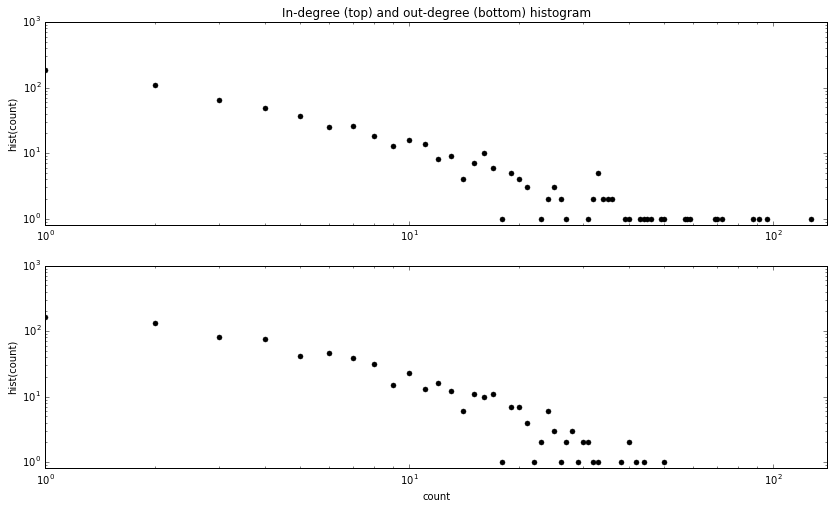

In [85]:
edges = np.subtract(range(1,130),0.5)
in_hist,_ = np.histogram(in_degs,bins=edges)
out_hist,_ = np.histogram(out_degs,bins=edges)

plot_edges = np.divide(np.add(edges[:-1],edges[1:]),2)
plt.subplot(2,1,1)
plt.title("In-degree (top) and out-degree (bottom) histogram")
plt.loglog(plot_edges,in_hist,".",color="k",markersize=10)
plt.xlim(1,140)
plt.ylim(0.8,1000)
plt.ylabel("hist(count)")
plt.subplot(2,1,2)
plt.loglog(plot_edges,out_hist,".",color="k",markersize=10)
plt.xlim(1,140)
plt.ylim(0.8,1000)
plt.ylabel("hist(count)")
plt.xlabel("count")
plt.show()

The figure shows the in-degree and out-degree histograms of the philosopher network on a double logarithmic axis. The in-degree resembles a power-law distribution with an approximately linear decline in the double logarithmic setting. The spread towards higher degrees can be explained by the limited size of the dataset as the minimum histogram value is 1.

In the out-degree histogram a light exponential cutoff is observed. This hints at a power-law distribution with sublinear preferential attachment. This limits the size of the biggest hubs. It can be explained in the context of a limited article length which can not contain infinitely many links.


** Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two. Do any particular philosophers stand out? **

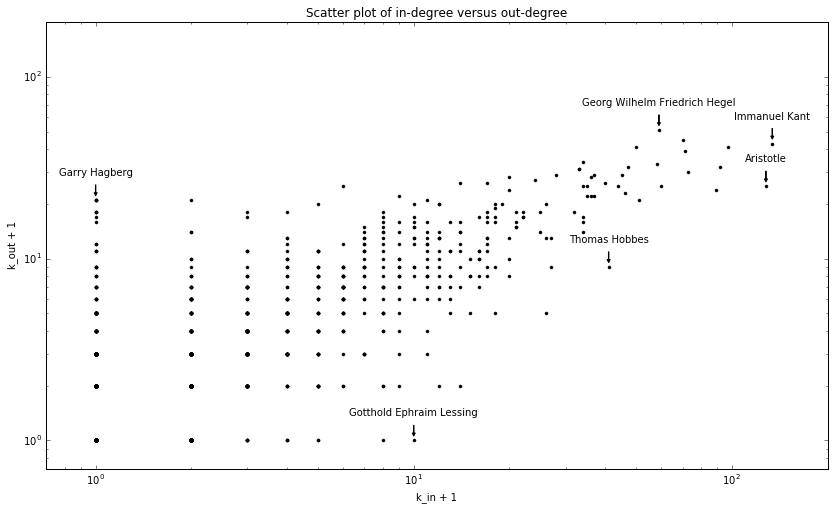

In [86]:
nodes = G.nodes()
xdata = np.array([G.in_degree(n) for n in nodes],int) +1
ydata = np.array([G.out_degree(n) for n in nodes],int) +1

highlight = ["Aristotle", "Immanuel Kant", "Georg Wilhelm Friedrich Hegel", "Thomas Hobbes"];

index_in_zero = [i for i,x in enumerate(xdata==1) if x]
index_out_zero = [i for i,x in enumerate(ydata==1) if x]

highlight.append(max([nodes[i] for i in index_out_zero], key=lambda n: G.in_degree(n)))
highlight.append(max([nodes[i] for i in index_in_zero], key=lambda n: G.out_degree(n)))

plt.loglog(xdata,ydata,".k")
for a in highlight:
    plt.annotate(a, xy=(xdata[nodes.index(a)],ydata[nodes.index(a)]),
                 xytext=(xdata[nodes.index(a)],1.5*ydata[nodes.index(a)]), textcoords='data',
                arrowprops=dict(facecolor='black',shrink=0.2, width=.4,headwidth=3,headlength=3),
                horizontalalignment='center',
                verticalalignment='top')
    
plt.xlim(0.7,200)
plt.ylim(0.7,200)
plt.title("Scatter plot of in-degree versus out-degree")
plt.xlabel("k_in + 1")
plt.ylabel("k_out + 1")
plt.show()

The results hint at a correlation between in-degree and out-degree. The curve flattens though, which makes sense. A single article does not contain indefinitely many references according to the popularity or the influence of the philosopher. The in-degree on the other hand does not have this limitation as a page can be referenced from arbitrarily many pages.

Certain philosophers stand out in the chart. Generally, these are philosophers with a high difference between in-degree and out-degree. First, the philosophers with the highest degrees. While Georg Wilhelm Friedrich Hegel as the philosopher with the highest out-degree seems to be part of a cluster, Aristotle and Immanuel Kant are outside of this cluster of high-degree nodes because they also have an even higher in-degree.

*Note that the degrees $k_i + 1$ are plotted in order to be able to represent the value zero on the logarithmic scale.*